<a href="https://colab.research.google.com/github/mlin3happy/ML-Learning/blob/main/Unsupervised_Learning_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import time


In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])

y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
data=x_train


# **Step 1: K means, Gausian Mixture**

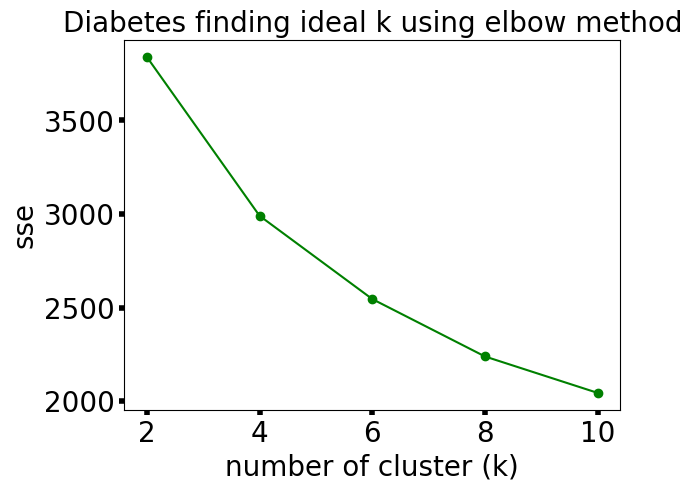

In [6]:
# https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure

scaler=StandardScaler()
X=scaler.fit_transform(data)
x_dataframe=pd.DataFrame(data=X, columns=df.columns[1:])
n_clusters=[2,4,6,8,10]
sse=[]
kmeans_score=[]
required_time=[]
for k in n_clusters:
  starttime=time.time()
  kmeans=KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=42).fit(x_dataframe)
  sse.append(kmeans.inertia_)
  kmeans_score.append(silhouette_score(data, kmeans.labels_))
  required_time.append(time.time()-starttime)

plt.plot(n_clusters, sse, color="green", marker="o")
plt.xlabel("number of cluster (k)", fontsize=20)
plt.ylabel("sse",fontsize=20)
plt.title("Diabetes finding ideal k using elbow method",fontsize=20)
plt.tick_params(labelsize=20, width=4)

plt.show()





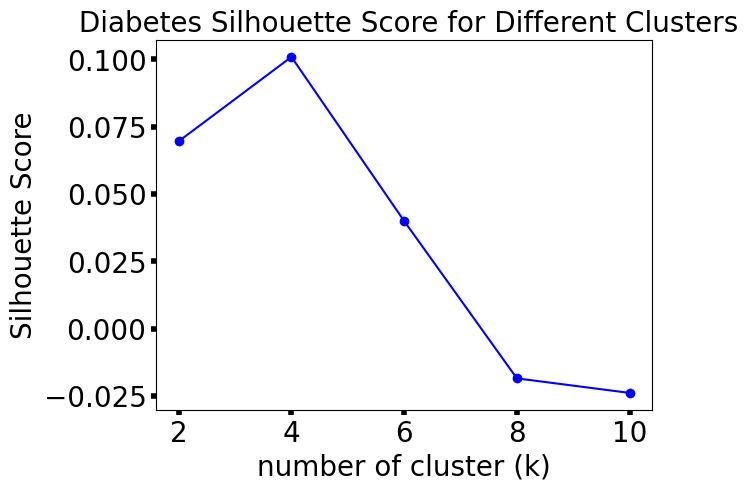

In [35]:
plt.plot(n_clusters, kmeans_score, color='b', marker="o")
plt.xlabel("number of cluster (k)", fontsize=20)
plt.ylabel("Silhouette Score", fontsize=20)
plt.title(" Diabetes Silhouette Score for Different Clusters", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

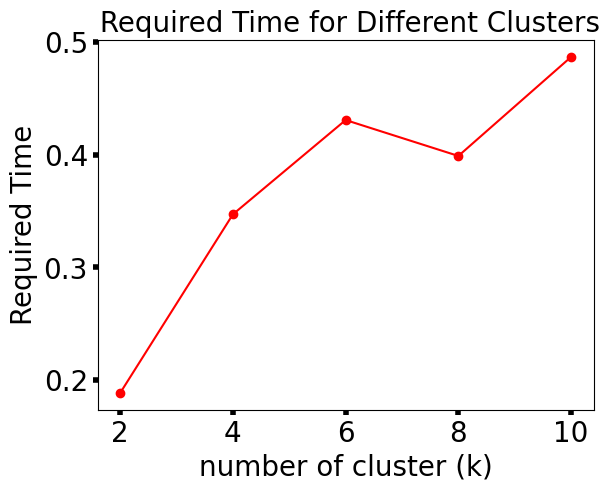

In [36]:
plt.plot(n_clusters, required_time, color='r', marker="o")
plt.xlabel("number of cluster (k)",fontsize=20)
plt.ylabel("Required Time",fontsize=20)
plt.title(" Required Time for Different Clusters",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

for gaussian mixture Diabetes Dataset, best combined hyperparameter is ('tied', 4)


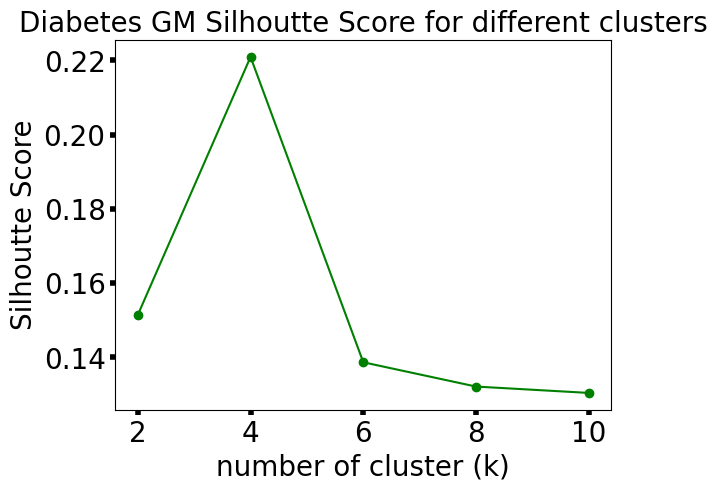

In [15]:
from itertools import product

from sklearn.mixture import GaussianMixture
covariance_list=['full', "tied","diag","spherical"]
combined_parameter=list(product(covariance_list,n_clusters))
score=[]
for i in combined_parameter:
  gm=GaussianMixture(n_components=i[1], covariance_type=i[0], random_state=42)
  gm.fit(x_dataframe)
  labels=gm.predict(x_dataframe)
  score.append(silhouette_score(x_dataframe, labels))
best_score=max(score)
best_score_loc=score.index(best_score)
best_hyperparameter=combined_parameter[best_score_loc]
print("for gaussian mixture Diabetes Dataset, best combined hyperparameter is {}".format(best_hyperparameter))

gmm_score=[]
required_time=[]
for k in n_clusters:
  starttime=time.time()
  gauss_M=GaussianMixture(n_components=k, covariance_type='tied', random_state=42)
  gauss_M.fit(x_dataframe)
  gmm_score.append(silhouette_score(x_dataframe, gauss_M.predict(x_dataframe)))
  required_time.append(time.time()-starttime)

plt.plot(n_clusters, gmm_score, color="green", marker="o")
plt.xlabel("number of cluster (k)",fontsize=20)
plt.ylabel("Silhoutte Score",fontsize=20)
plt.title("Diabetes GM Silhoutte Score for different clusters",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()








# **Part 2: PCA, ICA, Randomized Projections, Manifold Learning algorithm**

In [38]:
from sklearn.decomposition import PCA, FastICA as ICA

from sklearn.manifold import TSNE

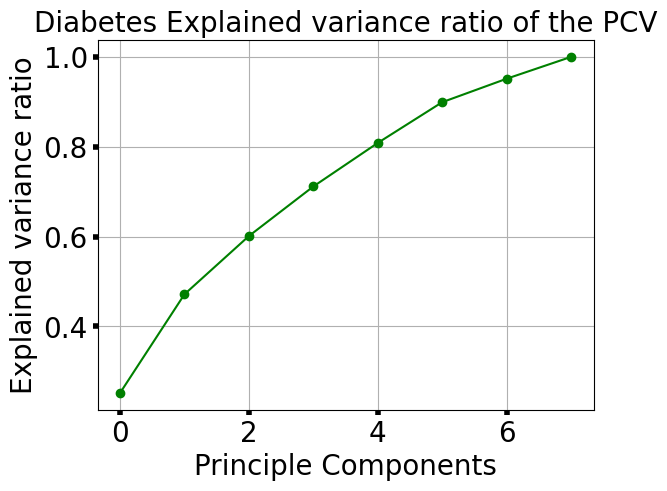

In [39]:
# PCA
# source code: https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
scaler=StandardScaler()
X=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X, columns=df.columns[1:])
pca=PCA(random_state=42)
pca_result=pca.fit(x_dataframe)
variance_ratio=pca_result.explained_variance_ratio_
variance_cumsum=np.cumsum(variance_ratio)
explained_variance=pca_result.explained_variance_
x_range=list(range(len(variance_ratio)))
plt.plot(x_range, variance_cumsum, color='green', marker='o')
plt.grid(True)
plt.title("Diabetes Explained variance ratio of the PCV",fontsize=20)
plt.xlabel("Principle Components",fontsize=20)
plt.ylabel("Explained variance ratio",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

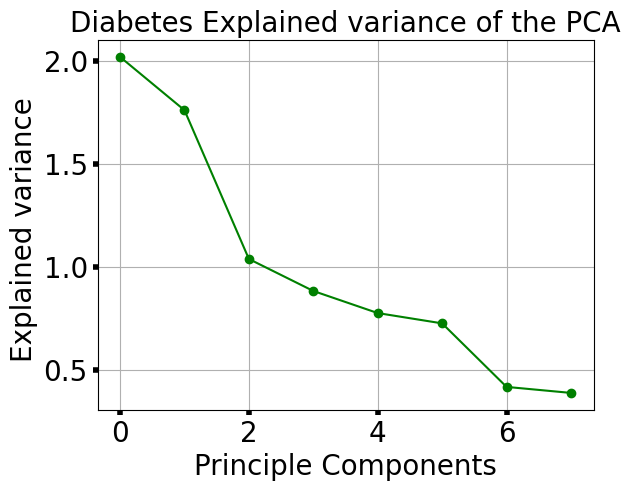

In [40]:
explained_variance=pca_result.explained_variance_

x_range=list(range(len(explained_variance)))
plt.plot(x_range, explained_variance, color='green', marker='o')
plt.grid(True)
plt.title("Diabetes Explained variance of the PCA",fontsize=20)
plt.xlabel("Principle Components",fontsize=20)
plt.ylabel("Explained variance ",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

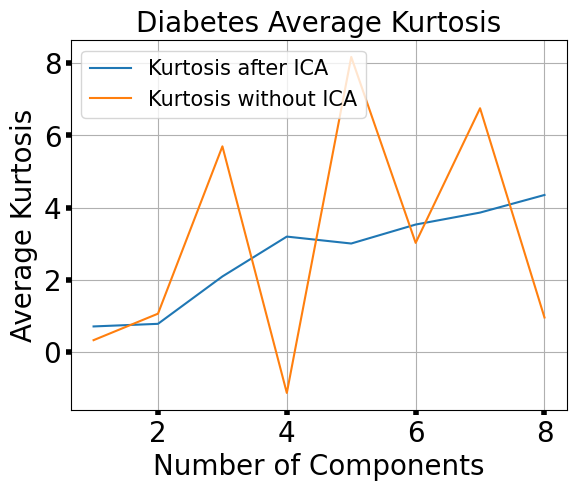

In [41]:
x_kurt=x_dataframe.kurt(axis=0)
component_list=list(np.arange(1,len(x_dataframe.columns)+1))
kurt_result=[]
for i in component_list:
  ica=ICA(random_state=42, n_components=i, whiten='arbitrary-variance').fit_transform(X)

  ica=pd.DataFrame(ica)

  kurtosis=ica.kurt(axis=0)
  kurt_result.append(np.abs(kurtosis).mean())
plt.figure()
plt.plot(component_list, kurt_result, label="Kurtosis after ICA")
plt.plot(component_list, x_kurt, label="Kurtosis without ICA")
plt.xlabel("Number of Components",fontsize=20)
plt.ylabel("Average Kurtosis",fontsize=20)
plt.grid(True)
plt.title("Diabetes Average Kurtosis",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.legend(fontsize=15)
plt.show()



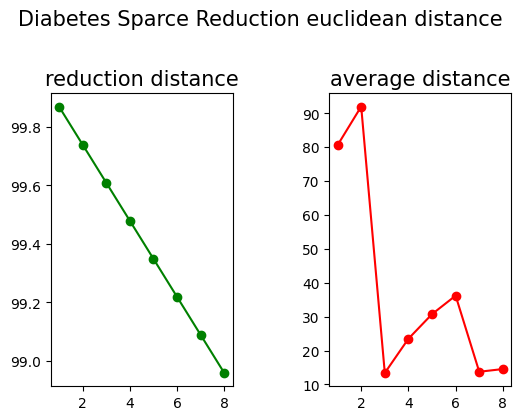

In [42]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
from collections import defaultdict
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.metrics import euclidean_distances
num_components = list(range(1, X.shape[1] + 1))
reduction_gauss = []
mean_abs_gauss = []
abs_diff_gauss=[]
for n_component in num_components:
    SR_data = SparseRandomProjection(random_state=42, n_components=n_component)
    X_transformed = SR_data.fit_transform(X)
    distance_raw = euclidean_distances(X)
    distance_transformed = euclidean_distances(X_transformed)
    abs_diff_gauss = abs(distance_raw - distance_transformed)
    reduction_gauss.append(100 - n_component / X.shape[0] * 100)
    mean_abs_gauss.append(np.mean(abs_diff_gauss.flatten()))
fig, (ax1, ax2)=plt.subplots(1,2)
ax1.plot(num_components, reduction_gauss, marker='o', c='g')
ax1.set_title("reduction distance",fontsize=15)
ax2.plot(num_components, mean_abs_gauss, marker='o', c='r')

ax2.set_title("average distance", fontsize=15)
fig.tight_layout(pad=5)
fig.suptitle("Diabetes Sparce Reduction euclidean distance", fontsize=15)
plt.show()



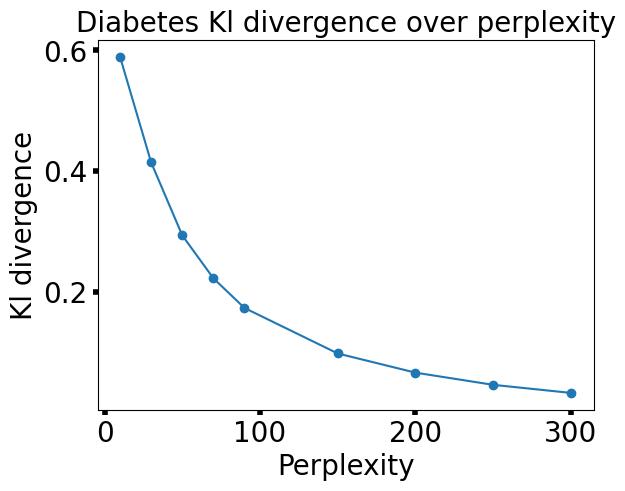

In [43]:
# TSNE
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
from sklearn.manifold import TSNE
num_components = list(range(1, X.shape[1] + 1))
Kl_list=[]
perplexity_list=[10,30,50,70,90,150,200,250,300]

for j in perplexity_list:
  tsne=TSNE(n_components=3, perplexity=j, random_state=42)
  tsne.fit_transform(X)
  KI=tsne.kl_divergence_
  Kl_list.append(KI)
plt.figure()
plt.plot(perplexity_list, Kl_list, marker='o')
plt.xlabel("Perplexity", fontsize=20)
plt.ylabel("Kl divergence",fontsize=20)
plt.title("Diabetes Kl divergence over perplexity",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()







# **Part 3: Re-applay clustering algorithms on the four dimension reduction data**

In [44]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
X=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X, columns=df.columns[1:])
# Kmeans
n_clusters=[2,4,6,8,10]
score_pca=[]
score_ica=[]
score_srp=[]
score_tsne=[]
pca=PCA(random_state=42)
pca_result=pca.fit_transform(x_dataframe)


for i in n_clusters:
  kmeans_pca=KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=42).fit(pca_result)
  score_pca.append(silhouette_score(pca_result, kmeans_pca.labels_))

ica=ICA(random_state=42)
ica_result=ica.fit_transform(x_dataframe)

for i in n_clusters:
  kmeans_ica=KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=42).fit(ica_result)
  score_ica.append(silhouette_score(ica_result, kmeans_ica.labels_))
srp=SparseRandomProjection(random_state=42, n_components=6)
srp_result=srp.fit_transform(x_dataframe)
for i in n_clusters:
  kmeans_srp=KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=42).fit(srp_result)
  score_srp.append(silhouette_score(srp_result, kmeans_srp.labels_))
tsne=TSNE(n_components=3, perplexity=300)
tsne_result=tsne.fit_transform(x_dataframe)
for i in n_clusters:
  kmeans_tsne=KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=42).fit(tsne_result)
  score_tsne.append(silhouette_score(tsne_result, kmeans_tsne.labels_))






/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


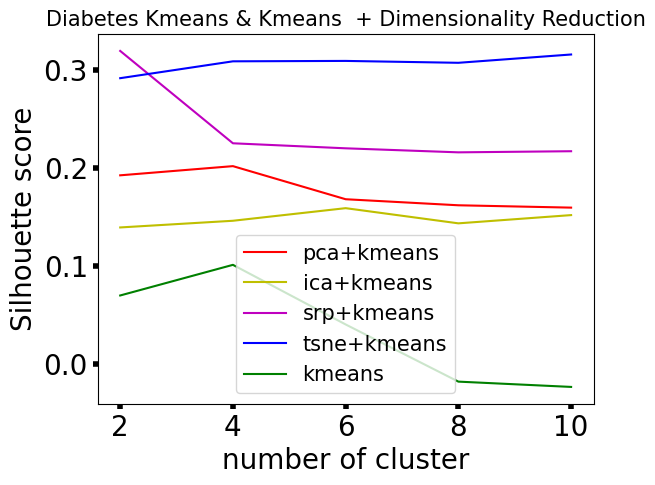

In [45]:
plt.figure()
plt.title("Diabetes Kmeans & Kmeans  + Dimensionality Reduction", fontsize=15)
plt.plot(n_clusters, score_pca, c="red", label="pca+kmeans")
plt.plot(n_clusters, score_ica, c="y", label="ica+kmeans")
plt.plot(n_clusters, score_srp, c="m", label="srp+kmeans")
plt.plot(n_clusters, score_tsne, c="b", label="tsne+kmeans")
plt.plot(n_clusters, kmeans_score, c="g", label="kmeans")
plt.ylabel("Silhouette score", fontsize=20)
plt.xlabel("number of cluster", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.legend(fontsize=15)

<ipython-input-13-1ee5b51b88bf>:24: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


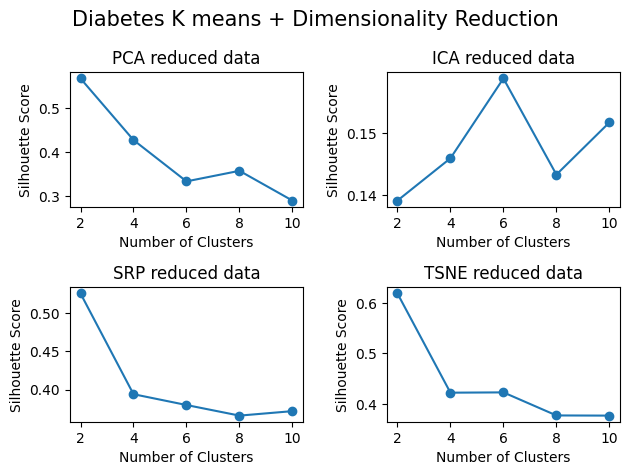

In [ ]:
fig,ax=plt.subplots(2,2, constrained_layout=True)
ax1=ax[0,0]
ax1.plot(n_clusters, score_pca, marker='o')
ax1.set_title("PCA reduced data")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Silhouette Score")
ax2=ax[0,1]
ax2.plot(n_clusters, score_ica, marker='o')
ax2.set_title("ICA reduced data")
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax3=ax[1,0]
ax3.plot(n_clusters, score_srp, marker='o')
ax3.set_title("SRP reduced data")
ax3.set_xlabel("Number of Clusters")
ax3.set_ylabel("Silhouette Score")
ax4=ax[1,1]
ax4.plot(n_clusters, score_tsne, marker='o')
ax4.set_title("TSNE reduced data")
ax4.set_xlabel("Number of Clusters")
ax4.set_ylabel("Silhouette Score")
fig.suptitle("Diabetes K means + Dimensionality Reduction", fontsize=15)

fig.tight_layout()

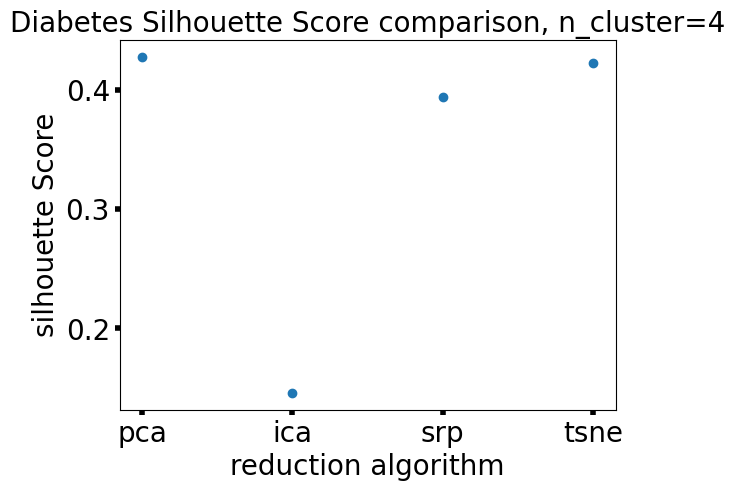

In [ ]:
kmean_list=["pca",'ica','srp','tsne']
score_result=[]
kmeans_pca=KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=42).fit(pca_result)
score_result.append(silhouette_score(pca_result, kmeans_pca.labels_))
kmeans_ica=KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=42).fit(ica_result)
score_result.append(silhouette_score(ica_result, kmeans_ica.labels_))
kmeans_srp=KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=42).fit(srp_result)
score_result.append(silhouette_score(srp_result, kmeans_srp.labels_))
kmeans_tsne=KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=42).fit(tsne_result)
score_result.append(silhouette_score(tsne_result, kmeans_tsne.labels_))
plt.figure()
plt.scatter(kmean_list,score_result)
plt.xlabel("reduction algorithm", fontsize=20)
plt.ylabel("silhouette Score",fontsize=20)
plt.title("Diabetes Silhouette Score comparison, n_cluster=4", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

In [50]:
#Gaussian Mixture

n_clusters=[2,4,6,8,10]
score_pca=[]
score_ica=[]
score_srp=[]
score_tsne=[]

pca=PCA(random_state=42)
pca_result=pca.fit_transform(x_dataframe)
for i in n_clusters:
  gmm=GaussianMixture(n_components=i, random_state=42)
  gauss_pca=gmm.fit(pca_result)
  pca_label=gmm.predict(pca_result)
  score_pca.append(silhouette_score(pca_result, pca_label))

ica=ICA(random_state=42)
ica_result=ica.fit_transform(x_dataframe)
for i in n_clusters:
  gmm=GaussianMixture(n_components=i, random_state=42)
  gauss_ica=gmm.fit(ica_result)
  ica_label=gmm.predict(ica_result)
  score_ica.append(silhouette_score(ica_result,ica_label ))

srp=SparseRandomProjection(random_state=42, n_components=6)
srp_result=srp.fit_transform(x_dataframe)
for i in n_clusters:
  gmm=GaussianMixture(n_components=i, random_state=42)
  gauss_srp=gmm.fit(srp_result)
  srp_label=gmm.predict(srp_result)
  score_srp.append(silhouette_score(srp_result,srp_label ))

tsne=TSNE(n_components=3, perplexity=300)
tsne_result=tsne.fit_transform(x_dataframe)
for i in n_clusters:
  gmm=GaussianMixture(n_components=i, random_state=42)
  gauss_tsne=gmm.fit(tsne_result)
  tsne_label=gmm.predict(tsne_result)
  score_tsne.append(silhouette_score(tsne_result,tsne_label ))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


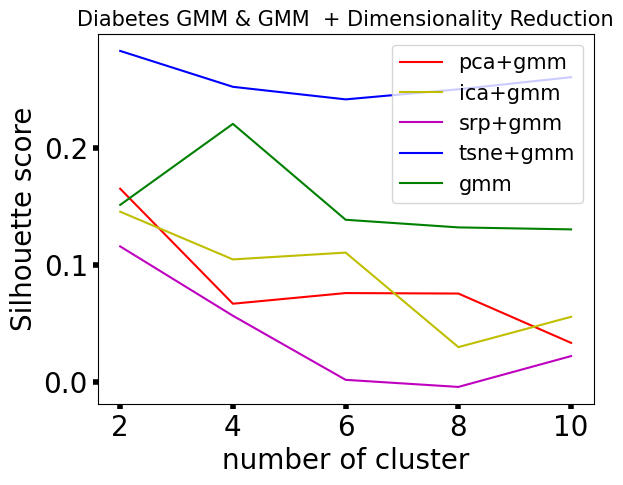

In [51]:
plt.figure()
plt.title("Diabetes GMM & GMM  + Dimensionality Reduction", fontsize=15)
plt.plot(n_clusters, score_pca, c="red", label="pca+gmm")
plt.plot(n_clusters, score_ica, c="y", label="ica+gmm")
plt.plot(n_clusters, score_srp, c="m", label="srp+gmm")
plt.plot(n_clusters, score_tsne, c="b", label="tsne+gmm")
plt.plot(n_clusters, gmm_score, c="g", label="gmm")
plt.ylabel("Silhouette score", fontsize=20)
plt.xlabel("number of cluster", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.legend(fontsize=15)

<ipython-input-17-496d00041cac>:24: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


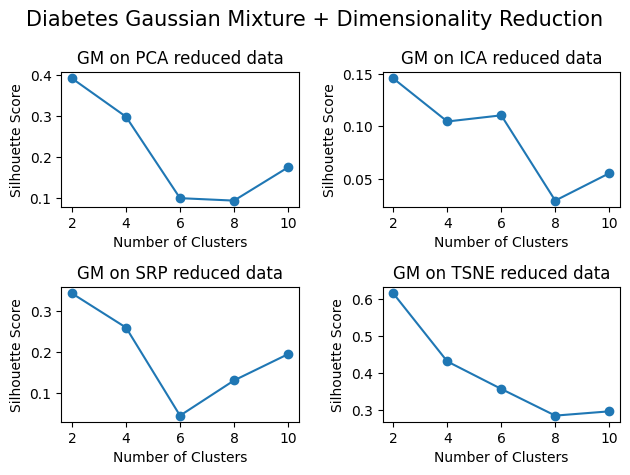

In [ ]:
fig,ax=plt.subplots(2,2, constrained_layout=True)
ax1=ax[0,0]
ax1.plot(n_clusters, score_pca, marker='o')
ax1.set_title("GM on PCA reduced data")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Silhouette Score")
ax2=ax[0,1]
ax2.plot(n_clusters, score_ica, marker='o')
ax2.set_title("GM on ICA reduced data")
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax3=ax[1,0]
ax3.plot(n_clusters, score_srp, marker='o')
ax3.set_title("GM on SRP reduced data")
ax3.set_xlabel("Number of Clusters")
ax3.set_ylabel("Silhouette Score")
ax4=ax[1,1]
ax4.plot(n_clusters, score_tsne, marker='o')
ax4.set_title("GM on TSNE reduced data")
ax4.set_xlabel("Number of Clusters")
ax4.set_ylabel("Silhouette Score")
fig.suptitle("Diabetes Gaussian Mixture + Dimensionality Reduction", fontsize=15)

fig.tight_layout()

<ipython-input-18-ca7906dd887c>:49: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


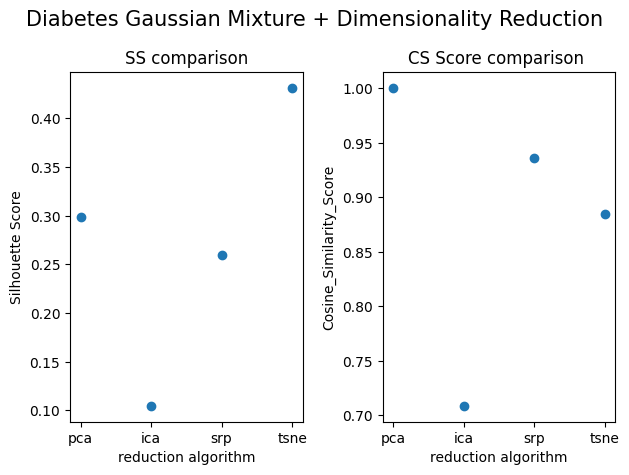

In [ ]:
gmm=GaussianMixture(n_components=4, random_state=42)
gmm_result=gmm.fit(X)
gmm_label=gmm.predict(X)
gmm_label=gmm_label.reshape(1,-1)

from sklearn.metrics.pairwise import cosine_similarity
GM_list=["pca",'ica','srp','tsne']
score_result=[]
cosine_similarity_list=[]
gauss_pca=gmm.fit(pca_result)
pca_label=gmm.predict(pca_result)
score_result.append(silhouette_score(pca_result, pca_label))
pca_label=pca_label.reshape(1,-1)
cosine_similarity_list.append(cosine_similarity(gmm_label,pca_label))

gauss_ica=gmm.fit(ica_result)
ica_label=gmm.predict(ica_result)
score_result.append(silhouette_score(ica_result, ica_label))
ica_label=ica_label.reshape(1,-1)
cosine_similarity_list.append(cosine_similarity(gmm_label,ica_label))


gauss_srp=gmm.fit(srp_result)
srp_label=gmm.predict(srp_result)
score_result.append(silhouette_score(srp_result, srp_label))
srp_label=srp_label.reshape(1,-1)
cosine_similarity_list.append(cosine_similarity(gmm_label,srp_label))


gauss_tsne=gmm.fit(tsne_result)
tsne_label=gmm.predict(tsne_result)
score_result.append(silhouette_score(tsne_result, tsne_label))
tsne_label=tsne_label.reshape(1,-1)
cosine_similarity_list.append(cosine_similarity(gmm_label,tsne_label))

fig,(ax1,ax2)=plt.subplots(1,2, constrained_layout=True)

ax1.scatter(GM_list,score_result, marker='o')
ax1.set_title("SS comparison")
ax1.set_xlabel("reduction algorithm")
ax1.set_ylabel("Silhouette Score")

ax2.scatter(GM_list,cosine_similarity_list, marker='o')
ax2.set_title("CS Score comparison ")
ax2.set_xlabel("reduction algorithm")
ax2.set_ylabel("Cosine_Similarity_Score")
fig.suptitle("Diabetes Gaussian Mixture + Dimensionality Reduction", fontsize=15)

fig.tight_layout()



# **Part 4 NN on PCA and Manifold learning algorithm**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV, learning_curve, validation_curve, cross_val_score
from joblib import dump,load
def NN_learner(x_train, x_test,y_train,y_test):
  learning_rate=np.linspace(0.001,0.01,10)
  hsize=[1,2,3,4,5,6,7]
  param_grid={'hidden_layer_sizes':hsize,'learning_rate_init': learning_rate}
  nngrid=GridSearchCV(estimator=MLPClassifier(solver='adam',random_state=42,activation='logistic', learning_rate='adaptive'),param_grid=param_grid, cv=10, n_jobs=-1)
  nngrid.fit(x_train, y_train)
  NNmodel=nngrid.best_estimator_
  dump(NNmodel,"model.joblib")
  estimator=load("model.joblib")
  NNmodel.fit(x_train,y_train)
  test_loss=NNmodel.loss_curve_
  y_train_prediction=NNmodel.predict(x_train)
  y_test_prediction=NNmodel.predict(x_test)
  cross_validation_score=cross_val_score(NNmodel,X,y,cv=5).mean()
  std_cv=np.std(cross_val_score(NNmodel,X,y,cv=5))
  train_sizes=np.linspace(0.1,1.0,8)
  train_sizes, train_score, valid_score, fit_times,_ =learning_curve(NNmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)

  train_score_mean=np.mean(train_score, axis=1)
  test_score_mean=valid_score.mean(axis=1)

  return(train_score_mean,test_score_mean, test_loss)


In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X_scaled, columns=df.columns[1:])
x_train,x_test,y_train,y_test=train_test_split(x_dataframe,y,test_size=0.25, random_state=42)


data=x_train
pca=PCA(random_state=42)
pca_result=pca.fit_transform(x_dataframe)
pca_df=pd.DataFrame(data=pca_result, columns=X.columns)
pca_df_nn=pd.concat([pca_df,y], axis=1)
X=pca_df_nn.drop(columns=['Outcome'])
y=pca_df_nn['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
pca_nn_train_score,pca_nn_test_scor, pca_loss=NN_learner(x_train,x_test,y_train,y_test)
# print(pca_nn)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
X=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X, columns=df.columns[1:])
x_train,x_test,y_train,y_test=train_test_split(x_dataframe,y,test_size=0.25, random_state=42)
nn_train_score,nn_test_score, nn_loss=NN_learner(x_train,x_test,y_train,y_test)


data=x_train
from sklearn.manifold import TSNE
tsne=TSNE(n_components=3, perplexity=300)
tsne_result=tsne.fit_transform(x_dataframe)

tsne_df=pd.DataFrame(data=tsne_result)
tsne_df_nn=pd.concat([tsne_df,y], axis=1)
X=tsne_df_nn.drop(columns=['Outcome'])
y=tsne_df_nn['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
tsne_nn_train_score,tsne_nn_test_score, tsne_loss=NN_learner(x_train,x_test,y_train,y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

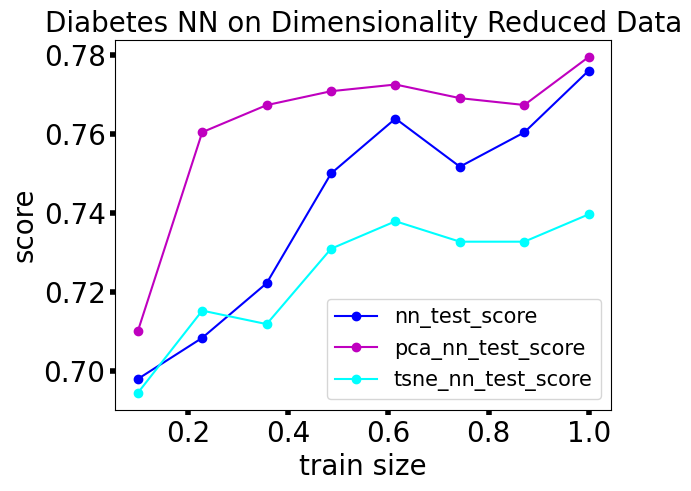

In [9]:
train_sizes=np.linspace(0.1,1.0,8)
# plt.plot(train_sizes, nn_train_score, marker='o', label='nn_train_score', c='g')
plt.plot(train_sizes, nn_test_score, marker='o', label='nn_test_score', c='b')

# plt.plot(train_sizes, pca_nn_train_score, marker='o', label='pca_nn_train_score', c='r')
plt.plot(train_sizes, pca_nn_test_scor, marker='o', label='pca_nn_test_score', c='m')
# plt.plot(train_sizes, tsne_nn_train_score, marker='o', label='tsne_nn_train_score', c='y')
plt.plot(train_sizes, tsne_nn_test_score, marker='o', label='tsne_nn_test_score', c='cyan')
plt.xlabel("train size", fontsize=20)
plt.ylabel("score", fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20, width=4)
plt.title("Diabetes NN on Dimensionality Reduced Data", fontsize=20)
plt.show()

# Part 5 NN on PCA and manifold algorithm with **Clustering**

In [12]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
X_scaled=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X_scaled, columns=df.columns[1:])

pca=PCA(random_state=42)
pca_result=pca.fit_transform(X)
pca_df=pd.DataFrame(data=pca_result, columns=X.columns)


kmeans_pca_nn_prediction=KMeans(n_clusters=2, random_state=42).fit_predict(pca_df)
kmeans_pca_nn_df=pd.DataFrame(data=kmeans_pca_nn_prediction, columns=['cluster'])
kmeans_pca_nn_data=pd.concat([pca_df,kmeans_pca_nn_df], axis=1)
kmeans_pca_df_nn=pd.concat([kmeans_pca_nn_data,y], axis=1)



X=kmeans_pca_df_nn.drop(columns=['Outcome'])
y=kmeans_pca_df_nn['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
kmeans_pca_nn_train_score,kmeans_pca_nn_test_score, kmeans_pca_nn_loss=NN_learner(x_train,x_test,y_train,y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
X_scaled=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X_scaled, columns=df.columns[1:])

tsne=TSNE(n_components=3, perplexity=300)
tsne_result=tsne.fit_transform(x_dataframe)
tsne_df=pd.DataFrame(data=tsne_result, columns=['tsne1','tsne2','tsne3'])

kmeans_tsne_nn_prediction=KMeans(n_clusters=4, random_state=42).fit_predict(tsne_df)
kmeans_tsne_nn_df=pd.DataFrame(data=kmeans_tsne_nn_prediction, columns=['cluster'])
kmeans_tsne_nn_data=pd.concat([tsne_df,kmeans_tsne_nn_df], axis=1)
kmeans_tsne_df_nn=pd.concat([kmeans_tsne_nn_data,y], axis=1)


X=kmeans_tsne_df_nn.drop(columns=['Outcome'])
y=kmeans_tsne_df_nn['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
kmeans_tsne_nn_train_score,kmeans_tsne_nn_test_score, kmeans_tsne_nn_loss=NN_learner(x_train,x_test,y_train,y_test)
# print(pca_nn)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
X_scaled=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X_scaled, columns=df.columns[1:])

tsne=TSNE(n_components=3, perplexity=300)
tsne_result=tsne.fit_transform(x_dataframe)
tsne_df=pd.DataFrame(data=tsne_result, columns=['tsne1','tsne2','tsne3'])

gmm=GaussianMixture(n_components=2, random_state=42)
gauss_pca=gmm.fit(tsne_result)
gauss_tsne_nn_prediction=gmm.predict(tsne_result)
gauss_tsne_nn_df=pd.DataFrame(data=gauss_tsne_nn_prediction, columns=['cluster'])
gauss_tsne_nn_data=pd.concat([tsne_df,gauss_tsne_nn_df], axis=1)
gauss_tsne_df_nn=pd.concat([gauss_tsne_nn_data,y], axis=1)


X=gauss_tsne_df_nn.drop(columns=['Outcome'])
y=gauss_tsne_df_nn['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
gauss_tsne_nn_train_score,gauss_tsne_nn_test_score,gauss_tsne_loss=NN_learner(x_train,x_test,y_train,y_test)
# print(pca_nn)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
X_scaled=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X_scaled, columns=df.columns[1:])

pca=PCA(random_state=42)
pca_result=pca.fit_transform(x_dataframe)
pca_df=pd.DataFrame(data=pca_result, columns=X.columns)

gmm=GaussianMixture(n_components=4, random_state=42)
gauss_pca=gmm.fit(pca_result)
gmm_pca_nn_prediction=gmm.predict(pca_result)
gmm_pca_nn_df=pd.DataFrame(data=gmm_pca_nn_prediction, columns=['cluster'])
gmm_pca_nn_data=pd.concat([pca_df,gmm_pca_nn_df], axis=1)
gmm_pca_df_nn=pd.concat([gmm_pca_nn_data,y], axis=1)

X=gmm_pca_df_nn.drop(columns=['Outcome'])
y=gmm_pca_df_nn['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
gmm_pca_nn_train_score,gmm_pca_nn_test_score,gmm_pca_loss=NN_learner(x_train,x_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

NameError: ignored

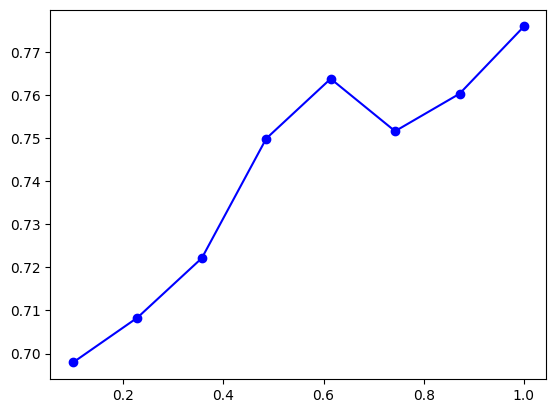

In [11]:
train_sizes=np.linspace(0.1,1.0,8)

plt.plot(train_sizes, nn_test_score, marker='o', label='nn_test_score', c='b')

plt.plot(train_sizes, kmeans_pca_nn_test_score, marker='o', label=' k-means pca_nn_test_score', c='m')

plt.plot(train_sizes, kmeans_tsne_nn_test_score, marker='o', label='k-means tsne_nn_test_score', c='cyan')
plt.legend(fontsize=15)
plt.tick_params(labelsize=20, width=4)
plt.title("NN On Kmeans + dimensionality reduced data", fontsize=20)
plt.show()

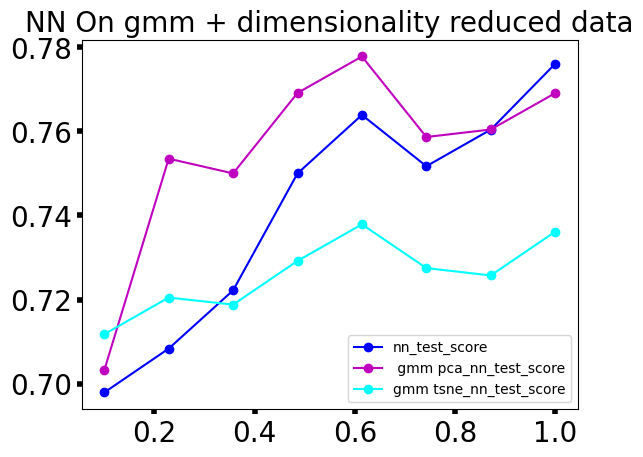

In [74]:
# plt.plot(train_sizes, nn_train_score, marker='o', label='nn_train_score', c='g')
plt.plot(train_sizes, nn_test_score, marker='o', label='nn_test_score', c='b')
# plt.plot(train_sizes, gmm_pca_nn_train_score, marker='o', label=' gmm pca_nn_train_score', c='r')
plt.plot(train_sizes, gmm_pca_nn_test_score, marker='o', label=' gmm pca_nn_test_score', c='m')
# plt.plot(train_sizes, gauss_tsne_nn_train_score, marker='o', label='gmm tsne_nn_train_score', c='y')
plt.plot(train_sizes, gauss_tsne_nn_test_score, marker='o', label='gmm tsne_nn_test_score', c='cyan')
plt.legend()
plt.tick_params(labelsize=20, width=4)
plt.title("NN On gmm + dimensionality reduced data", fontsize=20)
plt.show()
